In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

from sklearn.datasets import make_s_curve
data, color = make_s_curve(n_samples=1000)

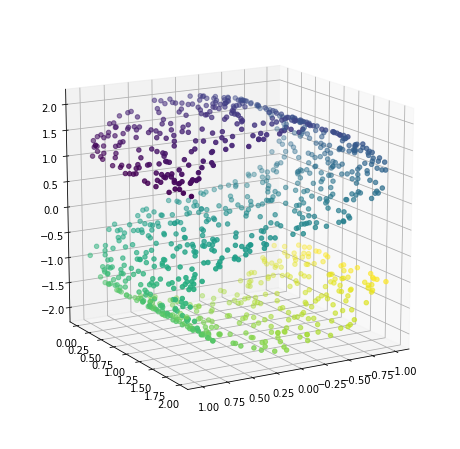

In [2]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data[:,0],ys=data[:,1],zs=data[:,2],c=color)
ax.view_init(15,60)

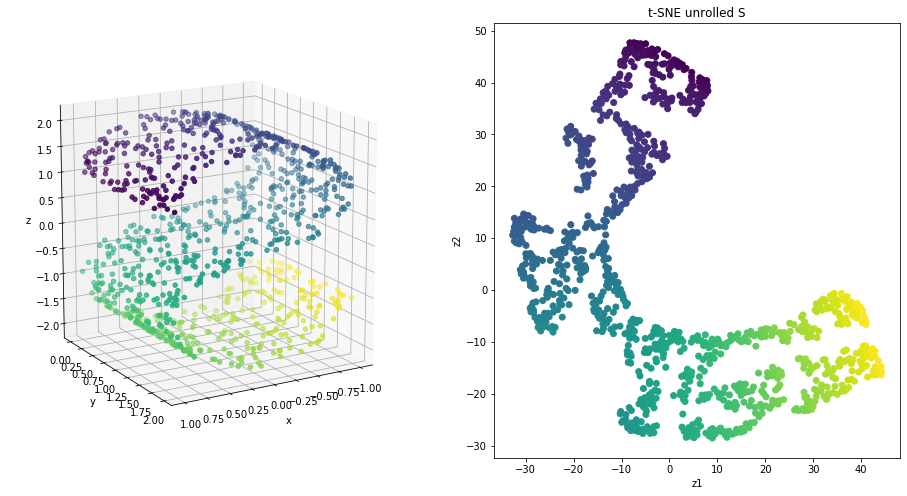

In [3]:
from sklearn.manifold import TSNE

n_components = 2

tSNE = TSNE(n_components=n_components,
            perplexity=30,
            early_exaggeration=12,
            learning_rate=200, # Remember: 
                               # too small, suboptimal solution/local minima,
                               # too large doesn't move towards optimal solution
            n_iter=1000,
            n_iter_without_progress=300,
            min_grad_norm=1e-7, # if gradient norm gets too slow learning stops
            metric='euclidean', # distance metric, can use either custom precomputed or any from here:
                                # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html
            init='random', # (n_samples, n_components), 'random', 'pca', or custom through numpy array
            verbose=0,
            random_state=0, # try different random states, find loss KL loss
            method='barnes_hut', # 'exact'
            angle=0.5, # When points are separated by less than this angular distance consider all points within
                       # this angle represented by 1 point. Larger -> more speed, lower performance
            n_jobs=2
           )
# equal to number of datapoints
data_transf = tSNE.fit_transform(data)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(xs=data[:,0],ys=data[:,1],zs=data[:,2],c=color)
ax.view_init(15,60)
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
ax = fig.add_subplot(122)
ax.scatter(x=data_transf[:,0],y=data_transf[:,1],c=color)
plt.xlabel('z1')
plt.ylabel('z2')
plt.title(f't-SNE unrolled S')
plt.show()

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

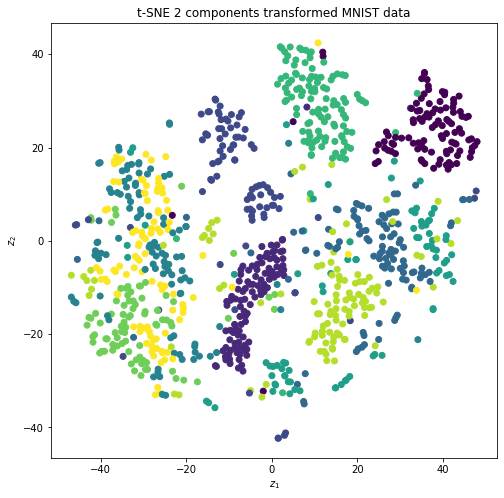

In [5]:
numToPlot=1000
n_components = 2

fig = plt.figure(figsize=(8,8))

tSNE = TSNE(n_components=n_components)

X_train_transf = tSNE.fit_transform(X_train.iloc[:numToPlot])

plt.scatter(X_train_transf[:numToPlot, 0], X_train_transf[:numToPlot, 1], c=y_train.astype(int).iloc[:numToPlot])
plt.title(f't-SNE 2 components transformed MNIST data')
plt.xlabel(r'$z_1$')
plt.ylabel(r'$z_2$')
plt.show()

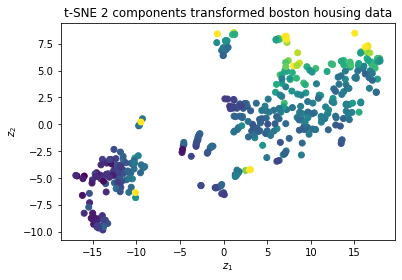

In [6]:
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = load_boston()

X, y = data["data"], data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipe = Pipeline([('std_scl',StandardScaler()),#std scaler before tSNE 
                 ('t-SNE',TSNE(n_components=2,perplexity=60))
                ])

X_train_transf = pipe.fit_transform(X_train)
plt.scatter(X_train_transf[:, 0], X_train_transf[:, 1], c=y_train)
plt.title(f't-SNE 2 components transformed boston housing data')
plt.xlabel(r'$z_1$')
plt.ylabel(r'$z_2$')
plt.show()